# EE0005 Mini Project

Dataset: This fake job dataset contains descriptions of 17000+ jobs, including both fake and real ones. Only a very small proportion of these descriptions are fake or scam which can be identified by the column "fraudulent".

Project Target: Visualize different features of job advertisements and predict the fraudulent jobs using machine learning and NLP tools.

Data cleaning and preprocessing methods: TF-IDF(for Tokenization,Stemming,Lemmatizing,etc) , Word2Vec/Doc2Vec(Word Embeddings), SMOTE(for Oversampling), Random Undersampling

Classification methods: Decision Trees, Logistic Regression, Neural Networks

Overview:

Exploratory Data Analysis and observations (By Dou Yuxiao)

TF-IDF (By Liu Jikun)

Prediction models (By Lu Jingjun)

Tackling imbalanced data & Word Embeddings(By Tang Yiyao)



#     

In [59]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedKFold
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedKFold
from gensim.models import Word2Vec
import re
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils
from sklearn.metrics import accuracy_score, f1_score
import sklearn

# Preparation: Exploratory data analysis / visualization
This part is done by Dou Yuxiao

In [3]:
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17880, 18)


In [5]:
print(df.dtypes)

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object


In [6]:
# Information about the Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Employment Type: 6
Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64


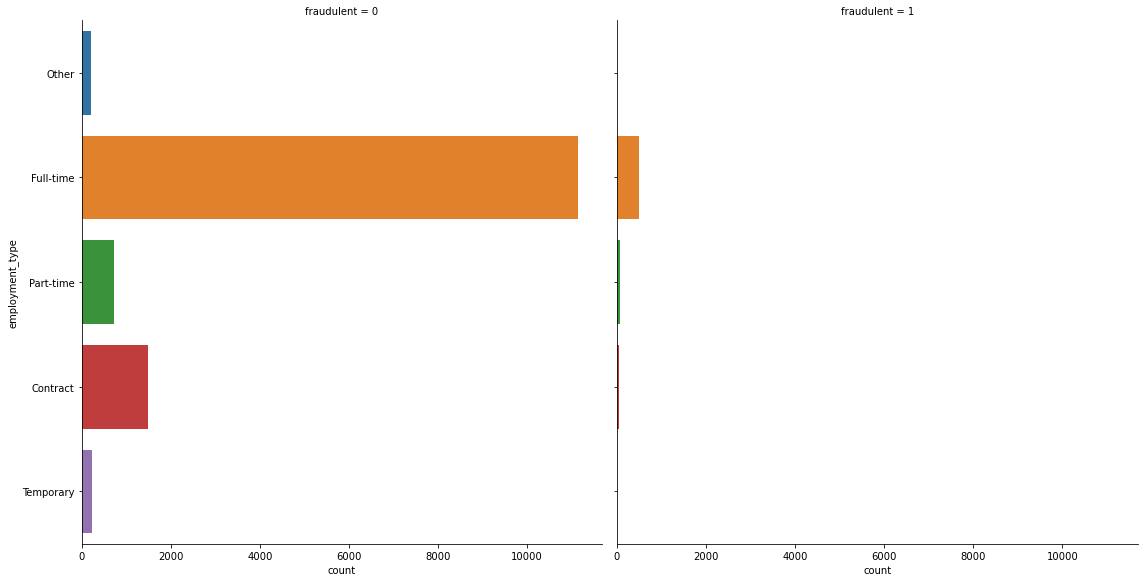

In [7]:
# Catagories in the Dataset
sb.catplot(y = 'employment_type', data = df, col = 'fraudulent', kind = 'count', col_wrap = 2, height = 8)

print("Employment Type:", len(df["employment_type"].unique()))
print(df["employment_type"].value_counts())



Required Experience: 8
Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64


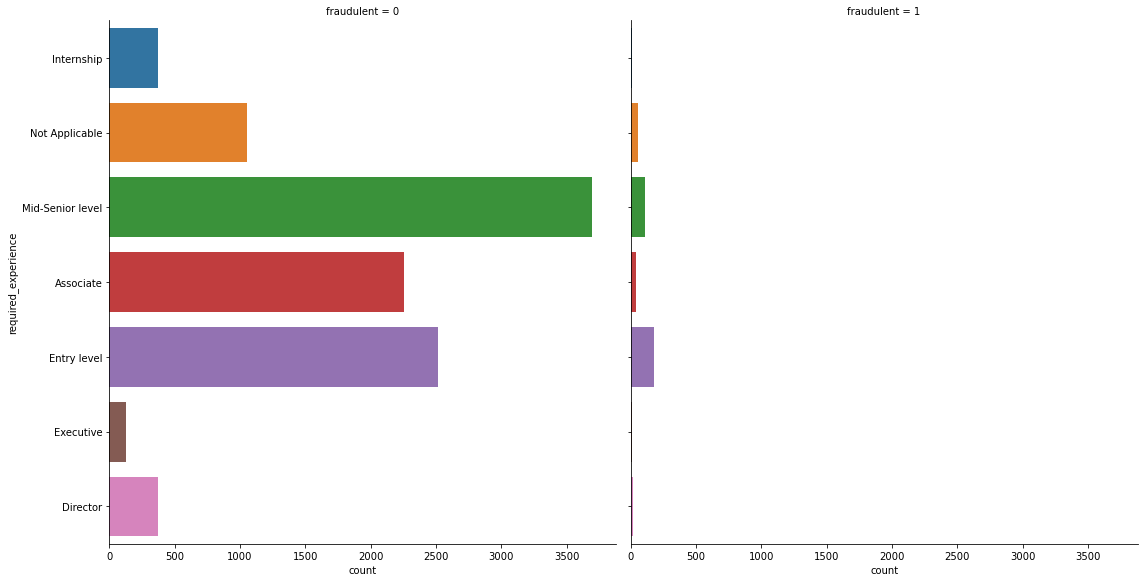

In [8]:
sb.catplot(y = 'required_experience', data = df, col = 'fraudulent', kind = 'count', col_wrap = 2, height = 8)
print("\nRequired Experience:", len(df["required_experience"].unique()))
print(df["required_experience"].value_counts())



Required Education: 14
Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64


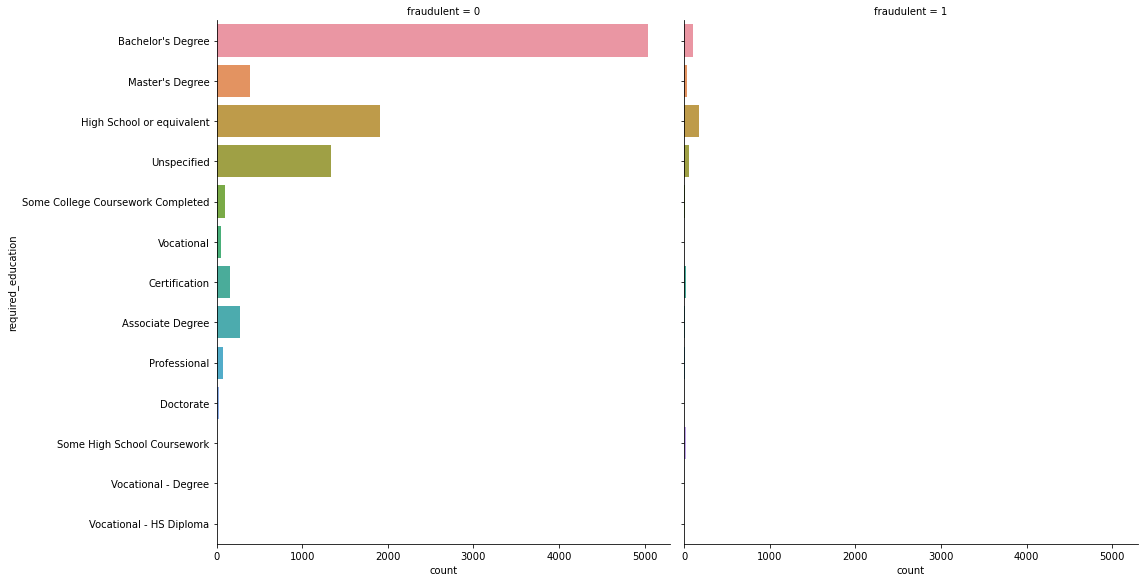

In [9]:
sb.catplot(y = 'required_education', data = df, col = 'fraudulent', kind = 'count', col_wrap = 2, height = 8)
print("\nRequired Education:", len(df["required_education"].unique()))
print(df["required_education"].value_counts())

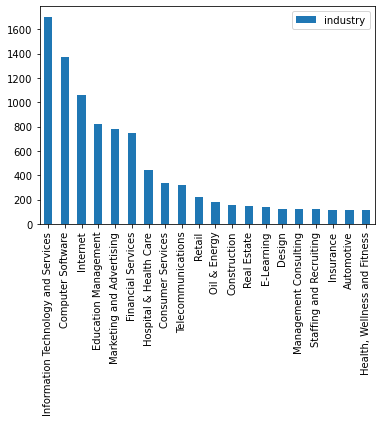

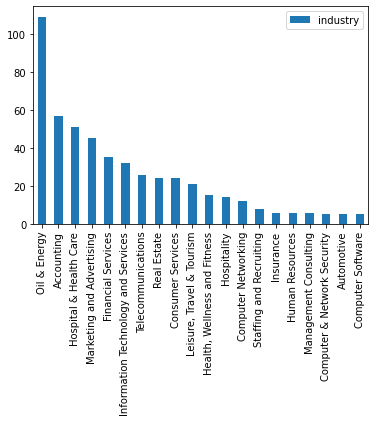

In [10]:
false_data = df[df["fraudulent"] == False]

loca = false_data["industry"].value_counts()
loca = loca.to_frame()
loca[0:20].plot(kind = 'bar')
false_data = df[df["fraudulent"] == True]

loca = false_data["industry"].value_counts()
loca = loca.to_frame()
loca[0:20].plot(kind = 'bar')


Employment Function: 38
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training      

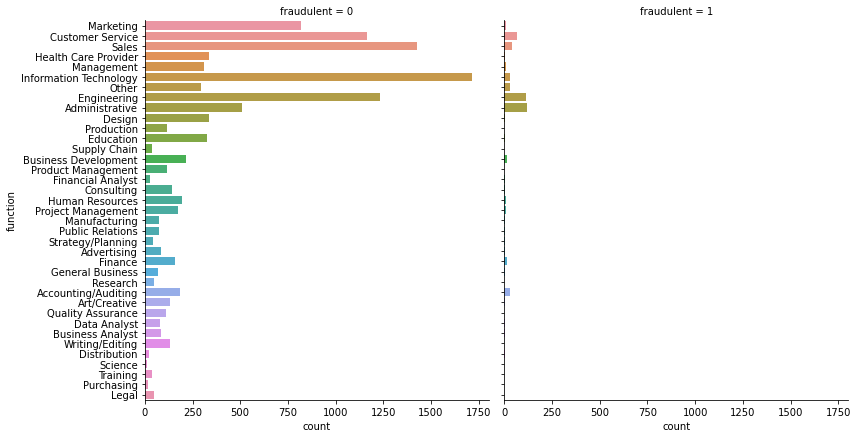

In [11]:
sb.catplot(y = 'function', data = df, col = 'fraudulent', kind = 'count', col_wrap = 2, height = 6)
print("\nEmployment Function:", len(df["function"].unique()))
print(df["function"].value_counts())

Number of Fraudulent Job: 17014

Fraudulent Job Location: 2914
GB, LND, London          716
US, NY, New York         638
GR, I, Athens            464
US, CA, San Francisco    461
US, ,                    311
                        ... 
US, NJ, Vineland           1
US, SC, Col                1
US, AR, Fayetteville       1
US, CA, BERKELY            1
US, WI, Pittsville         1
Name: location, Length: 2913, dtype: int64
Number of Fraudulent Job: 866

Fraudulent Job Location: 374
US, TX, Houston        92
AU, NSW, Sydney        31
US, ,                  28
US, CA, Bakersfield    24
US, CA, Los Angeles    23
                       ..
US, MS, oxford          1
US, MA, salem           1
US, MD, Hagerstown      1
US, NC, Garner          1
GB, ARM,                1
Name: location, Length: 373, dtype: int64


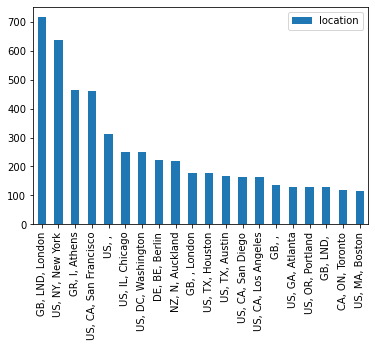

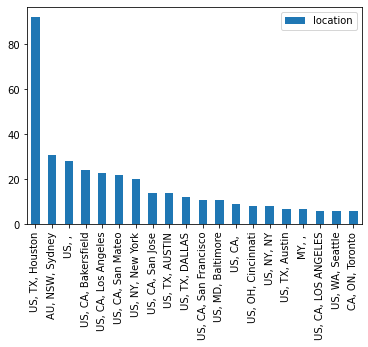

In [12]:
false_data = df[df["fraudulent"] == False]
print("Number of Fraudulent Job:", len(false_data))
print("\nFraudulent Job Location:", len(false_data["location"].unique()))
print(false_data["location"].value_counts())
loca = false_data["location"].value_counts()
loca = loca.to_frame()
loca[0:20].plot(kind = 'bar')


false_data = df[df["fraudulent"] == True]
print("Number of Fraudulent Job:", len(false_data))
print("\nFraudulent Job Location:", len(false_data["location"].unique()))
print(false_data["location"].value_counts())
loca = false_data["location"].value_counts()
loca = loca.to_frame()
loca[0:20].plot(kind = 'bar')



# Preprocessing using TFIDF 
This part is done by Liu Jikun

In [13]:
cols = ["title", "company_profile", "description", "requirements", "benefits"]
for c in cols:
    df[c] = df[c].fillna("")

def extract_features(df):    
    for c in cols:
        df[c+"_len"] = df[c].apply(lambda x : len(str(x)))
        df[c+"_wc"] = df[c].apply(lambda x : len(str(x.split())))
        
## for example, title_len is the length of title.
## title_wc is the total word count of title.

    
extract_features(df)

In [14]:
## Create TF IDF Features

df['combined_text'] = df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']

n_features = { "title" : 300,"combined_text" : 800}

for c, n in n_features.items():
    tfidf = TfidfVectorizer(max_features=n, norm='l2', stop_words = 'english')
    tfidf.fit(df[c])
    tfidf_train = np.array(tfidf.transform(df[c]).toarray(), dtype=np.float16)
    for i in range(n_features[c]):
        df[c + '_tfidf_' + str(i)] = tfidf_train[:, i]


In [15]:
## One Hot Encoding for Categorical Columns

cat_cols = ["employment_type", "required_experience", "required_education", "industry", "function", "location"]
for c in cat_cols:
    encoded = pd.get_dummies(df[c])
    df = pd.concat([df, encoded], axis=1)
#    axis=1代表把这些虚拟指标加到column里。

In [16]:
## Prepare Dataset : Drop unnecessary columns

drop_cols = ['title', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'combined_text']
drop_cols += cat_cols
df = df.drop(drop_cols, axis = 1)
df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,title_len,title_wc,company_profile_len,company_profile_wc,description_len,...,"ZA, GT, Soweto","ZA, GT, Tembisa","ZA, NL, DURBAN","ZA, NL, Durban","ZA, NL, Pietermaritzburg","ZA, NL, Richards Bay","ZA, WC, Cape Town","ZA, WC, Oudtshoorn","ZA, WC, Stellenbosch","ZM, ,"
0,1,0,1,0,0,16,23,885,1309,905,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,41,60,1286,1745,2077,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,39,52,879,1302,355,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,33,49,614,868,2600,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0,19,29,1628,2250,1520,...,0,0,0,0,0,0,0,0,0,0


In [17]:
## Build a Simple Logistic Model

df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

idd, target = "job_id", "fraudulent"
features = [f for f in df.columns if f not in [idd, target]]

X = df[features]
y = df[target]
X = np.asmatrix(X)
np.shape(X)


(17880, 4427)

In [18]:
from sklearn.model_selection import train_test_split

X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X, y, test_size = 0.2)

y_train_origin = pd.DataFrame(y_train_origin)
y_test_origin = pd.DataFrame(y_test_origin)

In [19]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_sample(X_train_origin, y_train_origin)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [20]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test_origin.shape, X_test_origin.shape)

Train Set : (27210, 1) (27210, 4427)
Test Set  : (3576, 1) (3576, 4427)


In [21]:
y_train["fraudulent"].value_counts()

1    13605
0    13605
Name: fraudulent, dtype: int64

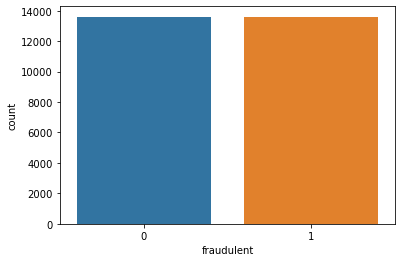

In [22]:
sb.countplot(y_train["fraudulent"])

# #1 Decision Classification Tree

In [23]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 20)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

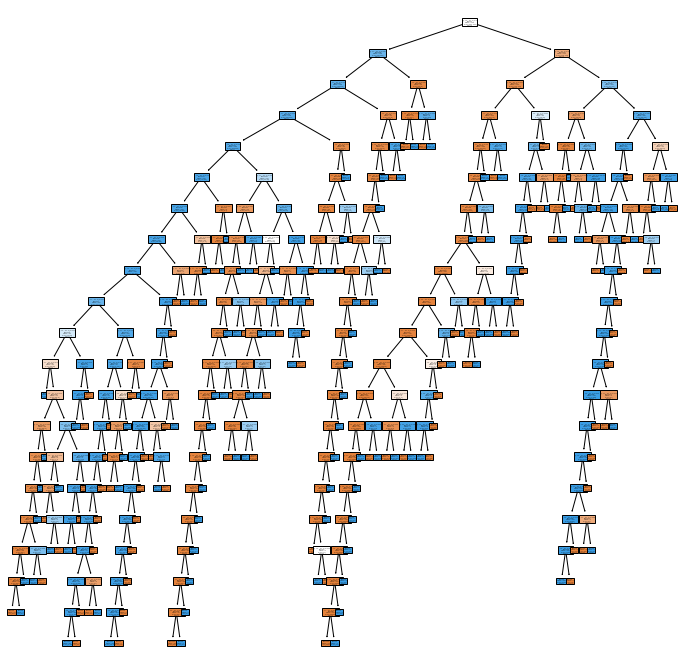

In [24]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.real,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)


plt.show()

Classification Accuracy 	: 0.9895994119808894


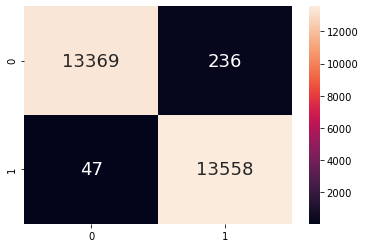

In [25]:
# Predict Legendary corresponding to Total Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9608501118568232


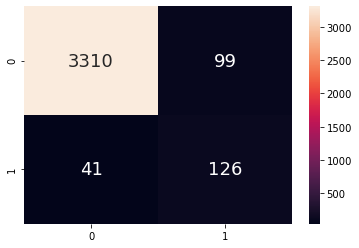

In [26]:
# Predict Legendary corresponding to Total Test
y_test_pred = dectree.predict(X_test_origin)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test_origin, y_test_origin))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test_origin, y_test_pred)
sb.heatmap(confusion_matrix(y_test_origin, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18})

In [30]:
from sklearn.metrics import accuracy_score, f1_score

FP = confusion_matrix(y_test_origin, y_test_pred).sum(axis=0) - np.diag(confusion_matrix(y_test_origin, y_test_pred))  
FN = confusion_matrix(y_test_origin, y_test_pred).sum(axis=1) - np.diag(confusion_matrix(y_test_origin, y_test_pred))
TP = np.diag(confusion_matrix(y_test_origin, y_test_pred))
TN = confusion_matrix(y_test_origin, y_test_pred).sum() - (FP + FN + TP)

FPR = 1.*FP/(FP+TN)
print("False Positive Rate & False Negative Rate:\t", FPR)
print('Testing F1 score: {}'.format(f1_score(y_test_origin, y_test_pred, average='weighted')))

False Positive Rate & False Negative Rate:	 [0.24550898 0.02904077]
Testing F1 score: 0.9635784538985366


# #2 Logistic Regression

In [31]:
clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)

In [ ]:
clf.predict(X_train)

In [ ]:
print("Train Set Accuracy:\t" + str(clf.score(X_train, y_train)))
print("Test Set Accuracy:\t" + str(clf.score(X_test_origin, y_test_origin)))

# #3 Neural Network

In [ ]:
model = Sequential()
model.add(Dense(units = 200 , activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 100 , activation = 'relu'))
model.add(Dense(units = 75 , activation = 'relu'))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs = 100)

In [ ]:
history = model.history.history

for key in history.keys():
    print(key)

In [ ]:
def plot_metrics(history):
    
    loss = history['loss']
    acc = history['accuracy']
    
    # Loss
    plt.figure()
    plt.plot(loss, label='Training Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(acc, label='Training Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
    
plot_metrics(history)

In [ ]:
preds = model.evaluate(x = X_test_origin, y = y_test_origin)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

# 4. Word Embeddings implemented by Doc2Vec 
This part is done by Tang Yiyao


In [31]:
df = pd.read_csv("fake_job_postings.csv") #Re-read the original dataset, as the df has been modified by previous manipulations.
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [32]:
#Preprocessing: Fill all the NA values with blank space
cols = ["title", "company_profile", "description", "requirements", "benefits"] 
for c in cols:
    df[c] = df[c].fillna("")

In [33]:
df['combined_text'] = df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']
text_results = pd.DataFrame(df[['combined_text','fraudulent']])
text_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   combined_text  17880 non-null  object
 1   fraudulent     17880 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 279.5+ KB


In [34]:
text_results.head()

,combined_text,fraudulent
0,"We're Food52, and we've created a groundbreaki...",0
1,"90 Seconds, the worlds Cloud Video Production ...",0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0


In [35]:
#A glance of the total number of words in the combined text
text_results['combined_text'].apply(lambda x: len(x.split(' '))).sum()

6634678

0    17014
1      866
Name: fraudulent, dtype: int64


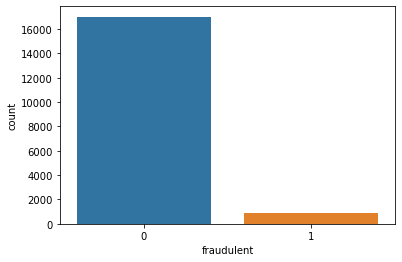

In [36]:
fraud_count =text_results['fraudulent'].value_counts()
print(fraud_count)
sb.countplot(text_results['fraudulent'])
#The dataset is hugely biased, hence requires re-sampling

In [37]:
fake_job = text_results[text_results['fraudulent'] == 1]
true_job = text_results[text_results['fraudulent'] == 0]
count = fake_job["fraudulent"].value_counts()
true_job_undersample = true_job.sample(count[1],replace=True)
text_results = pd.concat([fake_job,true_job_undersample], axis=0)

#This cell is used for random undersampling

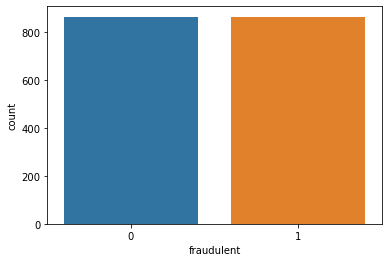

In [39]:
#Now the dataset is balanced, hence can be used for building train models
fraud_count =text_results['fraudulent'].value_counts()
sb.countplot(text_results['fraudulent'])

In [40]:
#Tokenization
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import TaggedDocument
train, test = train_test_split(text_results, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['combined_text']), tags=[r.fraudulent]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['combined_text']), tags=[r.fraudulent]), axis=1)

In [41]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [42]:
model_dbow = Doc2Vec(dm=0, vector_size=500, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 303836.98it/s]


In [43]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=500, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 607347.25it/s]


In [44]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 1232960.57it/s]


Wall time: 18.2 s


In [45]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 1215565.87it/s]


Wall time: 25.8 s


In [70]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors =zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [71]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5,max_iter =50000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [72]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5,max_iter =50000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [73]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [74]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [75]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

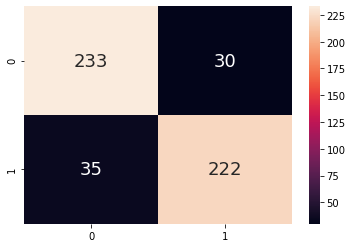

In [76]:
sb.heatmap(sklearn.metrics.confusion_matrix(y_test, y_pred), 
         annot = True, fmt=".0f", annot_kws={"size": 18})

In [77]:
FP = confusion_matrix(y_test, y_pred).sum(axis=0) - np.diag(confusion_matrix(y_test, y_pred))  
FN = confusion_matrix(y_test, y_pred).sum(axis=1) - np.diag(confusion_matrix(y_test, y_pred))
TP = np.diag(confusion_matrix(y_test, y_pred))
TN = confusion_matrix(y_test, y_pred).sum() - (FP + FN + TP)

FPR = 1.*FP/(FP+TN)
print("False Positive Rate & False Negative Rate:\t", FPR)
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

False Positive Rate & False Negative Rate:	 [0.13618677 0.11406844]
Testing F1 score: 0.8749745633216047
